In [ ]:
!wget https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

--2020-04-17 23:43:41--  https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
Resolving drive.google.com (drive.google.com)... 172.217.203.113, 172.217.203.100, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a’

uc?id=1coM7x3378f-O     [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-04-17 23:43:41 (50.0 MB/s) - ‘uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a’ saved [3249]



In [ ]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:01, 131MB/s]


In [ ]:
!unzip Covid_Data_GradientCrescent.zip

Archive:  Covid_Data_GradientCrescent.zip
   creating: all/
   creating: all/test/
   creating: all/test/covid/
  inflating: all/test/covid/nejmoa2001191_f3-PA.jpeg  
  inflating: all/test/covid/nejmoa2001191_f4.jpeg  
  inflating: all/test/covid/nejmoa2001191_f5-PA.jpeg  
  inflating: all/test/covid/radiol.2020200490.fig3.jpeg  
  inflating: all/test/covid/ryct.2020200028.fig1a.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig2.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day0.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day4.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day7.jpeg  
   creating: all/test/normal/
  inflating: all/test/normal/NORMAL2-IM-1385-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1396-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1400-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1401-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1406-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1412-0001.jpeg  


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
DATASET_PATH = '/content/two/train'
test_dir = '/content/two/test'
IMAGE_SIZE = (150, 150)
NUM_CLASSES = 2
BATCH_SIZE = 10 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 20
LEARNING_RATE =0.0005 

In [ ]:
#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = 'training',
                                                  seed=42,
                                                  class_mode='binary')
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = 'validation',
                                                  seed=42,
                                                  class_mode='binary')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches,
                           steps_per_epoch =STEP_SIZE_TRAIN,
                           validation_data = valid_batches,
                           validation_steps = STEP_SIZE_VALID,
                           epochs= NUM_EPOCHS,
                           )

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 28s 3s/step - loss: 0.9622 - acc: 0.5426 - val_loss: 0.6579 - val_acc: 0.6500
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 0.4694 - acc: 0.7340 - val_loss: 0.3837 - val_acc: 0.8125
Epoch 3/20
10/10 [==============================] - 27s 3s/step - loss: 0.3856 - acc: 0.8617 - val_loss: 0.6206 - val_acc: 0.8125
Epoch 4/20
10/10 [==============================] - 27s 3s/step - loss: 0.2153 - acc: 0.9043 - val_loss: 0.1584 - val_acc: 0.9500
Epoch 5/20
10/10 [==============================] - 28s 3s/step - loss: 0.2292 - acc: 0.9200 - val_loss: 0.3927 - val_acc: 0.8750
Epoch 6/20
10/10 [==============================] - 26s 3s/step - loss: 0.1955 - acc: 0.9545 - val_loss: 0.1773 - val_acc: 1.0000
Epoch 7/20
10/10 [==============================] - 27s 3s/step - loss: 0.1873 - acc: 0.9255 - val_loss: 0.1269 - val_acc: 0.9000
Epoch 8/20
10/10 [==============================] - 28s 3s/step - loss: 0.1953 - acc: 0.9400 - val_lo

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over '+ str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()

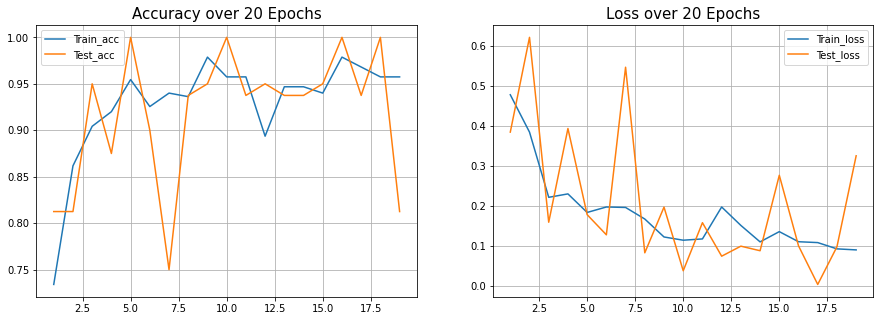

In [ ]:
plot_acc_loss(result, 20)